## Hyperparameter search

Source: https://github.com/itdxer/neupy/blob/master/notebooks/Hyperparameter%20optimization%20for%20Neural%20Networks.ipynb
and http://neupy.com/2016/12/17/hyperparameter_optimization_for_neural_networks.html#id14

```python
Hyperparams to train:
1. lamda
2. number of hidden layers
3. number of hidden units
3. starter learning rate
5. use_sigmoid_h1
6. use_sigmoid_h2```

In [1]:
import time
import os
import sys
sys.path = sys.path[1:]
sys.path.insert(0, os.path.join(os.getcwd(), "helper_scripts"))  # pretending we are running main.py in jupyter

from global_variables_final_for_git import Global_Vars
from prep_for_model_for_git import Model_preparation

import hyperopt
from hyperopt import fmin
import HPO_helper
reload(HPO_helper)
from HPO_helper import uniform_int, loguniform_int, tpe_method, get_parameter_space_forHPO
import tensorflow_model_for_git
reload(tensorflow_model_for_git)
from tensorflow_model_for_git import Tensorflow_model

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
class Args(object):
    def __init__(self):
        self.gene = "NANOG"
        self.distance = 200
        self.use_tad_info = True
        self.pcc_lowerlimit_to_filter_dhss = 0.25
        self.take_log2_tpm = True
        self.filter_tfs_by = "zscore" # or "pcc"
        self.lowerlimit_to_filter_tfs = 4.75
        self.take_this_many_top_fts = 15  # all dhss/tfs will already be filtered by pcc(or zscore)
        self.init_wts_type = "corr"
        self.outputDir = "/Users/Dinesh/Dropbox/Github/predicting_gex_with_nn_git/Output/"+self.gene.upper()
        self.use_random_DHSs = True
        self.use_random_TFs = True
        self.max_iter = 300

start_time = time.time()
args = Args()
gv = Global_Vars(args, args.outputDir)  # note this takes in new_output_dir as well in .py scripts
mp = Model_preparation(gv)

2018-01-21 09:43:45,686: global_variables_final_for_git: INFO    : Setting up the DNase-seq dataframe and gene expression vector..
2018-01-21 09:43:56,190: global_variables_final_for_git: INFO    : Done. Setting up the training and testing split..
2018-01-21 09:43:56,202: prep_for_model_for_git: INFO    : Preparing the dataframe for train/test splits..


lamda:0.0003, layer_sizes:[8]
lamda:3e-07, layer_sizes:[9, 8]
lamda:0.0003, layer_sizes:[12, 4]
lamda:0.3, layer_sizes:[9]
lamda:0.3, layer_sizes:[8]
lamda:0.0003, layer_sizes:[13, 3]
lamda:3e-07, layer_sizes:[13, 4]
lamda:0.003, layer_sizes:[6, 6]
lamda:3e-06, layer_sizes:[10, 5]
lamda:3e-05, layer_sizes:[11, 7]


2018-01-21 09:44:33,329: tensorflow_model_for_git: INFO    : Test Group 0:Adipose, Median Test Percentage Error: 0.107, Best Params: {'layers': 1, 'lamda': 4.0, 'n_units_layer_21': 12.0, 'n_units_layer_22': 4.0}


lamda:0.0003, layer_sizes:[8, 7]
lamda:0.3, layer_sizes:[7]
lamda:0.0003, layer_sizes:[9]
lamda:0.03, layer_sizes:[11, 4]
lamda:3e-06, layer_sizes:[10]
lamda:3e-07, layer_sizes:[6, 8]
lamda:3e-07, layer_sizes:[6, 8]
lamda:3e-06, layer_sizes:[6, 6]
lamda:3e-07, layer_sizes:[13, 3]
lamda:3e-05, layer_sizes:[13, 3]


2018-01-21 09:45:40,721: tensorflow_model_for_git: INFO    : Test Group 1:Blood & T-cell, Median Test Percentage Error: 0.1166, Best Params: {'layers': 1, 'lamda': 7.0, 'n_units_layer_21': 13.0, 'n_units_layer_22': 3.0}
2018-01-21 09:45:40,721: tensorflow_model_for_git: INFO    : Test Group 1:Blood & T-cell, Median Test Percentage Error: 0.1166, Best Params: {'layers': 1, 'lamda': 7.0, 'n_units_layer_21': 13.0, 'n_units_layer_22': 3.0}


lamda:3e-06, layer_sizes:[8]
lamda:0.003, layer_sizes:[9]
lamda:0.03, layer_sizes:[9, 4]
lamda:3e-05, layer_sizes:[10, 4]
lamda:0.003, layer_sizes:[8]
lamda:3e-07, layer_sizes:[13, 3]
lamda:3e-05, layer_sizes:[6, 8]
lamda:3e-05, layer_sizes:[12, 6]
lamda:0.3, layer_sizes:[9, 5]
lamda:3e-07, layer_sizes:[6, 7]


2018-01-21 09:47:16,655: tensorflow_model_for_git: INFO    : Test Group 2:Brain, Median Test Percentage Error: 0.0652, Best Params: {'layers': 1, 'lamda': 5.0, 'n_units_layer_21': 10.0, 'n_units_layer_22': 4.0}
2018-01-21 09:47:16,655: tensorflow_model_for_git: INFO    : Test Group 2:Brain, Median Test Percentage Error: 0.0652, Best Params: {'layers': 1, 'lamda': 5.0, 'n_units_layer_21': 10.0, 'n_units_layer_22': 4.0}
2018-01-21 09:47:16,655: tensorflow_model_for_git: INFO    : Test Group 2:Brain, Median Test Percentage Error: 0.0652, Best Params: {'layers': 1, 'lamda': 5.0, 'n_units_layer_21': 10.0, 'n_units_layer_22': 4.0}


lamda:0.0003, layer_sizes:[9]
lamda:3e-06, layer_sizes:[10, 7]
lamda:3e-05, layer_sizes:[10]
lamda:0.003, layer_sizes:[13]
lamda:0.3, layer_sizes:[11]
lamda:3e-07, layer_sizes:[10, 8]
lamda:3e-07, layer_sizes:[7, 8]
lamda:3e-07, layer_sizes:[13, 3]
lamda:0.3, layer_sizes:[11, 5]
lamda:0.003, layer_sizes:[6, 6]


2018-01-21 09:49:12,789: tensorflow_model_for_git: INFO    : Test Group 3:Digestive, Median Test Percentage Error: 0.0773, Best Params: {'layers': 1, 'lamda': 7.0, 'n_units_layer_21': 10.0, 'n_units_layer_22': 8.0}
2018-01-21 09:49:12,789: tensorflow_model_for_git: INFO    : Test Group 3:Digestive, Median Test Percentage Error: 0.0773, Best Params: {'layers': 1, 'lamda': 7.0, 'n_units_layer_21': 10.0, 'n_units_layer_22': 8.0}
2018-01-21 09:49:12,789: tensorflow_model_for_git: INFO    : Test Group 3:Digestive, Median Test Percentage Error: 0.0773, Best Params: {'layers': 1, 'lamda': 7.0, 'n_units_layer_21': 10.0, 'n_units_layer_22': 8.0}
2018-01-21 09:49:12,789: tensorflow_model_for_git: INFO    : Test Group 3:Digestive, Median Test Percentage Error: 0.0773, Best Params: {'layers': 1, 'lamda': 7.0, 'n_units_layer_21': 10.0, 'n_units_layer_22': 8.0}


lamda:0.0003, layer_sizes:[12]
lamda:3e-05, layer_sizes:[9]
lamda:0.003, layer_sizes:[10, 3]
lamda:0.0003, layer_sizes:[6]
lamda:3e-07, layer_sizes:[6]
lamda:0.3, layer_sizes:[10, 3]
lamda:0.3, layer_sizes:[7, 4]
lamda:0.03, layer_sizes:[13, 8]
lamda:3e-07, layer_sizes:[11, 6]
lamda:3e-07, layer_sizes:[13, 7]


2018-01-21 09:51:49,665: tensorflow_model_for_git: INFO    : Test Group 5:ES-deriv, Median Test Percentage Error: 0.0912, Best Params: {'layers': 1, 'lamda': 7.0, 'n_units_layer_21': 11.0, 'n_units_layer_22': 6.0}
2018-01-21 09:51:49,665: tensorflow_model_for_git: INFO    : Test Group 5:ES-deriv, Median Test Percentage Error: 0.0912, Best Params: {'layers': 1, 'lamda': 7.0, 'n_units_layer_21': 11.0, 'n_units_layer_22': 6.0}
2018-01-21 09:51:49,665: tensorflow_model_for_git: INFO    : Test Group 5:ES-deriv, Median Test Percentage Error: 0.0912, Best Params: {'layers': 1, 'lamda': 7.0, 'n_units_layer_21': 11.0, 'n_units_layer_22': 6.0}
2018-01-21 09:51:49,665: tensorflow_model_for_git: INFO    : Test Group 5:ES-deriv, Median Test Percentage Error: 0.0912, Best Params: {'layers': 1, 'lamda': 7.0, 'n_units_layer_21': 11.0, 'n_units_layer_22': 6.0}
2018-01-21 09:51:49,665: tensorflow_model_for_git: INFO    : Test Group 5:ES-deriv, Median Test Percentage Error: 0.0912, Best Params: {'layers'

lamda:0.03, layer_sizes:[11, 7]
lamda:0.0003, layer_sizes:[9]
lamda:0.0003, layer_sizes:[13]
lamda:3e-06, layer_sizes:[10]
lamda:3e-06, layer_sizes:[10]
lamda:0.3, layer_sizes:[12, 8]
lamda:0.3, layer_sizes:[6, 4]
lamda:0.03, layer_sizes:[6, 3]
lamda:0.3, layer_sizes:[6, 3]
lamda:0.003, layer_sizes:[8, 5]


2018-01-21 09:54:56,662: tensorflow_model_for_git: INFO    : Test Group 6:ESC, Median Test Percentage Error: 0.1013, Best Params: {'layers': 1, 'lamda': 3.0, 'n_units_layer_21': 8.0, 'n_units_layer_22': 5.0}
2018-01-21 09:54:56,662: tensorflow_model_for_git: INFO    : Test Group 6:ESC, Median Test Percentage Error: 0.1013, Best Params: {'layers': 1, 'lamda': 3.0, 'n_units_layer_21': 8.0, 'n_units_layer_22': 5.0}
2018-01-21 09:54:56,662: tensorflow_model_for_git: INFO    : Test Group 6:ESC, Median Test Percentage Error: 0.1013, Best Params: {'layers': 1, 'lamda': 3.0, 'n_units_layer_21': 8.0, 'n_units_layer_22': 5.0}
2018-01-21 09:54:56,662: tensorflow_model_for_git: INFO    : Test Group 6:ESC, Median Test Percentage Error: 0.1013, Best Params: {'layers': 1, 'lamda': 3.0, 'n_units_layer_21': 8.0, 'n_units_layer_22': 5.0}
2018-01-21 09:54:56,662: tensorflow_model_for_git: INFO    : Test Group 6:ESC, Median Test Percentage Error: 0.1013, Best Params: {'layers': 1, 'lamda': 3.0, 'n_units_l

lamda:3e-07, layer_sizes:[10, 6]
lamda:3e-06, layer_sizes:[8]
lamda:0.003, layer_sizes:[12, 4]
lamda:0.3, layer_sizes:[8, 4]
lamda:3e-07, layer_sizes:[10]
lamda:3e-05, layer_sizes:[12, 8]
lamda:0.003, layer_sizes:[6, 7]
lamda:3e-07, layer_sizes:[9, 6]
lamda:3e-05, layer_sizes:[6, 5]
lamda:0.3, layer_sizes:[13]


2018-01-21 09:58:39,936: tensorflow_model_for_git: INFO    : Test Group 7:Epithelial, Median Test Percentage Error: 0.1714, Best Params: {'layers': 1, 'lamda': 7.0, 'n_units_layer_21': 9.0, 'n_units_layer_22': 6.0}
2018-01-21 09:58:39,936: tensorflow_model_for_git: INFO    : Test Group 7:Epithelial, Median Test Percentage Error: 0.1714, Best Params: {'layers': 1, 'lamda': 7.0, 'n_units_layer_21': 9.0, 'n_units_layer_22': 6.0}
2018-01-21 09:58:39,936: tensorflow_model_for_git: INFO    : Test Group 7:Epithelial, Median Test Percentage Error: 0.1714, Best Params: {'layers': 1, 'lamda': 7.0, 'n_units_layer_21': 9.0, 'n_units_layer_22': 6.0}
2018-01-21 09:58:39,936: tensorflow_model_for_git: INFO    : Test Group 7:Epithelial, Median Test Percentage Error: 0.1714, Best Params: {'layers': 1, 'lamda': 7.0, 'n_units_layer_21': 9.0, 'n_units_layer_22': 6.0}
2018-01-21 09:58:39,936: tensorflow_model_for_git: INFO    : Test Group 7:Epithelial, Median Test Percentage Error: 0.1714, Best Params: {'l

lamda:0.003, layer_sizes:[8, 7]
lamda:0.003, layer_sizes:[10]
lamda:0.0003, layer_sizes:[8, 7]
lamda:0.0003, layer_sizes:[8, 7]
lamda:3e-06, layer_sizes:[10, 8]
lamda:3e-07, layer_sizes:[13, 3]
lamda:3e-07, layer_sizes:[6]
lamda:3e-06, layer_sizes:[12, 4]
lamda:0.3, layer_sizes:[13]
lamda:3e-06, layer_sizes:[11, 5]


2018-01-21 10:02:48,926: tensorflow_model_for_git: INFO    : Test Group 8:HSC & B-cell, Median Test Percentage Error: 0.3515, Best Params: {'layers': 1, 'lamda': 6.0, 'n_units_layer_21': 10.0, 'n_units_layer_22': 8.0}
2018-01-21 10:02:48,926: tensorflow_model_for_git: INFO    : Test Group 8:HSC & B-cell, Median Test Percentage Error: 0.3515, Best Params: {'layers': 1, 'lamda': 6.0, 'n_units_layer_21': 10.0, 'n_units_layer_22': 8.0}
2018-01-21 10:02:48,926: tensorflow_model_for_git: INFO    : Test Group 8:HSC & B-cell, Median Test Percentage Error: 0.3515, Best Params: {'layers': 1, 'lamda': 6.0, 'n_units_layer_21': 10.0, 'n_units_layer_22': 8.0}
2018-01-21 10:02:48,926: tensorflow_model_for_git: INFO    : Test Group 8:HSC & B-cell, Median Test Percentage Error: 0.3515, Best Params: {'layers': 1, 'lamda': 6.0, 'n_units_layer_21': 10.0, 'n_units_layer_22': 8.0}
2018-01-21 10:02:48,926: tensorflow_model_for_git: INFO    : Test Group 8:HSC & B-cell, Median Test Percentage Error: 0.3515, Be

lamda:3e-05, layer_sizes:[9, 3]
lamda:0.3, layer_sizes:[7, 3]
lamda:0.0003, layer_sizes:[9]
lamda:0.03, layer_sizes:[12]
lamda:0.03, layer_sizes:[8]
lamda:3e-07, layer_sizes:[6]
lamda:0.03, layer_sizes:[6]
lamda:3e-07, layer_sizes:[9]
lamda:3e-05, layer_sizes:[12]
lamda:0.3, layer_sizes:[13, 8]


2018-01-21 10:07:09,928: tensorflow_model_for_git: INFO    : Test Group 9:Heart, Median Test Percentage Error: 0.2518, Best Params: {'layers': 0, 'lamda': 2.0, 'n_units_layer_11': 8.0}
2018-01-21 10:07:09,928: tensorflow_model_for_git: INFO    : Test Group 9:Heart, Median Test Percentage Error: 0.2518, Best Params: {'layers': 0, 'lamda': 2.0, 'n_units_layer_11': 8.0}
2018-01-21 10:07:09,928: tensorflow_model_for_git: INFO    : Test Group 9:Heart, Median Test Percentage Error: 0.2518, Best Params: {'layers': 0, 'lamda': 2.0, 'n_units_layer_11': 8.0}
2018-01-21 10:07:09,928: tensorflow_model_for_git: INFO    : Test Group 9:Heart, Median Test Percentage Error: 0.2518, Best Params: {'layers': 0, 'lamda': 2.0, 'n_units_layer_11': 8.0}
2018-01-21 10:07:09,928: tensorflow_model_for_git: INFO    : Test Group 9:Heart, Median Test Percentage Error: 0.2518, Best Params: {'layers': 0, 'lamda': 2.0, 'n_units_layer_11': 8.0}
2018-01-21 10:07:09,928: tensorflow_model_for_git: INFO    : Test Group 9:H

lamda:3e-06, layer_sizes:[10]
lamda:3e-06, layer_sizes:[12, 7]
lamda:3e-05, layer_sizes:[11, 5]
lamda:3e-05, layer_sizes:[7]
lamda:0.003, layer_sizes:[12, 5]
lamda:0.03, layer_sizes:[6, 4]
lamda:0.0003, layer_sizes:[8, 8]
lamda:0.3, layer_sizes:[10, 3]
lamda:3e-07, layer_sizes:[10, 6]
lamda:0.0003, layer_sizes:[13]


2018-01-21 10:12:02,471: tensorflow_model_for_git: INFO    : Test Group 10:IMR90, Median Test Percentage Error: 0.2157, Best Params: {'layers': 1, 'lamda': 5.0, 'n_units_layer_21': 11.0, 'n_units_layer_22': 5.0}
2018-01-21 10:12:02,471: tensorflow_model_for_git: INFO    : Test Group 10:IMR90, Median Test Percentage Error: 0.2157, Best Params: {'layers': 1, 'lamda': 5.0, 'n_units_layer_21': 11.0, 'n_units_layer_22': 5.0}
2018-01-21 10:12:02,471: tensorflow_model_for_git: INFO    : Test Group 10:IMR90, Median Test Percentage Error: 0.2157, Best Params: {'layers': 1, 'lamda': 5.0, 'n_units_layer_21': 11.0, 'n_units_layer_22': 5.0}
2018-01-21 10:12:02,471: tensorflow_model_for_git: INFO    : Test Group 10:IMR90, Median Test Percentage Error: 0.2157, Best Params: {'layers': 1, 'lamda': 5.0, 'n_units_layer_21': 11.0, 'n_units_layer_22': 5.0}
2018-01-21 10:12:02,471: tensorflow_model_for_git: INFO    : Test Group 10:IMR90, Median Test Percentage Error: 0.2157, Best Params: {'layers': 1, 'lamd

lamda:3e-05, layer_sizes:[6]
lamda:3e-06, layer_sizes:[11]
lamda:3e-05, layer_sizes:[12]
lamda:0.3, layer_sizes:[12]
lamda:0.003, layer_sizes:[9, 3]
lamda:0.03, layer_sizes:[9, 3]
lamda:0.003, layer_sizes:[9, 7]
lamda:0.003, layer_sizes:[13, 3]
lamda:3e-07, layer_sizes:[6, 5]
lamda:0.3, layer_sizes:[13, 5]


2018-01-21 10:17:29,911: tensorflow_model_for_git: INFO    : Test Group 11:Mesench, Median Test Percentage Error: 0.238, Best Params: {'layers': 1, 'lamda': 3.0, 'n_units_layer_21': 9.0, 'n_units_layer_22': 3.0}
2018-01-21 10:17:29,911: tensorflow_model_for_git: INFO    : Test Group 11:Mesench, Median Test Percentage Error: 0.238, Best Params: {'layers': 1, 'lamda': 3.0, 'n_units_layer_21': 9.0, 'n_units_layer_22': 3.0}
2018-01-21 10:17:29,911: tensorflow_model_for_git: INFO    : Test Group 11:Mesench, Median Test Percentage Error: 0.238, Best Params: {'layers': 1, 'lamda': 3.0, 'n_units_layer_21': 9.0, 'n_units_layer_22': 3.0}
2018-01-21 10:17:29,911: tensorflow_model_for_git: INFO    : Test Group 11:Mesench, Median Test Percentage Error: 0.238, Best Params: {'layers': 1, 'lamda': 3.0, 'n_units_layer_21': 9.0, 'n_units_layer_22': 3.0}
2018-01-21 10:17:29,911: tensorflow_model_for_git: INFO    : Test Group 11:Mesench, Median Test Percentage Error: 0.238, Best Params: {'layers': 1, 'lam

lamda:3e-06, layer_sizes:[7]
lamda:0.003, layer_sizes:[12, 7]
lamda:0.003, layer_sizes:[7, 4]
lamda:3e-05, layer_sizes:[11]
lamda:0.0003, layer_sizes:[12]
lamda:0.3, layer_sizes:[6, 3]
lamda:0.3, layer_sizes:[6, 3]
lamda:0.003, layer_sizes:[9, 5]
lamda:3e-07, layer_sizes:[9, 5]
lamda:3e-07, layer_sizes:[13, 8]


2018-01-21 10:23:32,748: tensorflow_model_for_git: INFO    : Test Group 12:Muscle, Median Test Percentage Error: 0.2636, Best Params: {'layers': 1, 'lamda': 7.0, 'n_units_layer_21': 9.0, 'n_units_layer_22': 5.0}
2018-01-21 10:23:32,748: tensorflow_model_for_git: INFO    : Test Group 12:Muscle, Median Test Percentage Error: 0.2636, Best Params: {'layers': 1, 'lamda': 7.0, 'n_units_layer_21': 9.0, 'n_units_layer_22': 5.0}
2018-01-21 10:23:32,748: tensorflow_model_for_git: INFO    : Test Group 12:Muscle, Median Test Percentage Error: 0.2636, Best Params: {'layers': 1, 'lamda': 7.0, 'n_units_layer_21': 9.0, 'n_units_layer_22': 5.0}
2018-01-21 10:23:32,748: tensorflow_model_for_git: INFO    : Test Group 12:Muscle, Median Test Percentage Error: 0.2636, Best Params: {'layers': 1, 'lamda': 7.0, 'n_units_layer_21': 9.0, 'n_units_layer_22': 5.0}
2018-01-21 10:23:32,748: tensorflow_model_for_git: INFO    : Test Group 12:Muscle, Median Test Percentage Error: 0.2636, Best Params: {'layers': 1, 'lam

lamda:0.3, layer_sizes:[12, 5]
lamda:0.003, layer_sizes:[12, 5]
lamda:3e-06, layer_sizes:[7, 5]
lamda:3e-06, layer_sizes:[9, 6]
lamda:0.0003, layer_sizes:[11]
lamda:3e-07, layer_sizes:[6, 8]
lamda:3e-05, layer_sizes:[6]
lamda:0.03, layer_sizes:[6, 3]
lamda:3e-07, layer_sizes:[9, 3]
lamda:3e-05, layer_sizes:[6]


2018-01-21 10:30:11,860: tensorflow_model_for_git: INFO    : Test Group 13:Myosat, Median Test Percentage Error: 0.394, Best Params: {'layers': 1, 'lamda': 6.0, 'n_units_layer_21': 7.0, 'n_units_layer_22': 5.0}
2018-01-21 10:30:11,860: tensorflow_model_for_git: INFO    : Test Group 13:Myosat, Median Test Percentage Error: 0.394, Best Params: {'layers': 1, 'lamda': 6.0, 'n_units_layer_21': 7.0, 'n_units_layer_22': 5.0}
2018-01-21 10:30:11,860: tensorflow_model_for_git: INFO    : Test Group 13:Myosat, Median Test Percentage Error: 0.394, Best Params: {'layers': 1, 'lamda': 6.0, 'n_units_layer_21': 7.0, 'n_units_layer_22': 5.0}
2018-01-21 10:30:11,860: tensorflow_model_for_git: INFO    : Test Group 13:Myosat, Median Test Percentage Error: 0.394, Best Params: {'layers': 1, 'lamda': 6.0, 'n_units_layer_21': 7.0, 'n_units_layer_22': 5.0}
2018-01-21 10:30:11,860: tensorflow_model_for_git: INFO    : Test Group 13:Myosat, Median Test Percentage Error: 0.394, Best Params: {'layers': 1, 'lamda': 

lamda:0.003, layer_sizes:[8, 5]
lamda:3e-05, layer_sizes:[8]
lamda:0.0003, layer_sizes:[10, 6]
lamda:3e-06, layer_sizes:[13]
lamda:3e-06, layer_sizes:[12, 3]
lamda:0.3, layer_sizes:[13, 3]
lamda:3e-07, layer_sizes:[13, 3]
lamda:0.03, layer_sizes:[11, 8]
lamda:3e-07, layer_sizes:[6, 5]
lamda:3e-07, layer_sizes:[13]


2018-01-21 10:37:23,961: tensorflow_model_for_git: INFO    : Test Group 14:Neurosph, Median Test Percentage Error: 0.2004, Best Params: {'layers': 1, 'lamda': 7.0, 'n_units_layer_21': 6.0, 'n_units_layer_22': 5.0}
2018-01-21 10:37:23,961: tensorflow_model_for_git: INFO    : Test Group 14:Neurosph, Median Test Percentage Error: 0.2004, Best Params: {'layers': 1, 'lamda': 7.0, 'n_units_layer_21': 6.0, 'n_units_layer_22': 5.0}
2018-01-21 10:37:23,961: tensorflow_model_for_git: INFO    : Test Group 14:Neurosph, Median Test Percentage Error: 0.2004, Best Params: {'layers': 1, 'lamda': 7.0, 'n_units_layer_21': 6.0, 'n_units_layer_22': 5.0}
2018-01-21 10:37:23,961: tensorflow_model_for_git: INFO    : Test Group 14:Neurosph, Median Test Percentage Error: 0.2004, Best Params: {'layers': 1, 'lamda': 7.0, 'n_units_layer_21': 6.0, 'n_units_layer_22': 5.0}
2018-01-21 10:37:23,961: tensorflow_model_for_git: INFO    : Test Group 14:Neurosph, Median Test Percentage Error: 0.2004, Best Params: {'layers

lamda:3e-05, layer_sizes:[11, 4]
lamda:3e-06, layer_sizes:[8]
lamda:0.3, layer_sizes:[7, 5]
lamda:0.3, layer_sizes:[11, 4]
lamda:0.003, layer_sizes:[6, 8]
lamda:3e-07, layer_sizes:[13]
lamda:0.0003, layer_sizes:[13, 7]
lamda:0.003, layer_sizes:[13, 8]
lamda:0.0003, layer_sizes:[13, 7]
lamda:0.03, layer_sizes:[13]


2018-01-21 10:45:19,712: tensorflow_model_for_git: INFO    : Test Group 15:Other, Median Test Percentage Error: 0.0683, Best Params: {'layers': 1, 'lamda': 4.0, 'n_units_layer_21': 13.0, 'n_units_layer_22': 7.0}
2018-01-21 10:45:19,712: tensorflow_model_for_git: INFO    : Test Group 15:Other, Median Test Percentage Error: 0.0683, Best Params: {'layers': 1, 'lamda': 4.0, 'n_units_layer_21': 13.0, 'n_units_layer_22': 7.0}
2018-01-21 10:45:19,712: tensorflow_model_for_git: INFO    : Test Group 15:Other, Median Test Percentage Error: 0.0683, Best Params: {'layers': 1, 'lamda': 4.0, 'n_units_layer_21': 13.0, 'n_units_layer_22': 7.0}
2018-01-21 10:45:19,712: tensorflow_model_for_git: INFO    : Test Group 15:Other, Median Test Percentage Error: 0.0683, Best Params: {'layers': 1, 'lamda': 4.0, 'n_units_layer_21': 13.0, 'n_units_layer_22': 7.0}
2018-01-21 10:45:19,712: tensorflow_model_for_git: INFO    : Test Group 15:Other, Median Test Percentage Error: 0.0683, Best Params: {'layers': 1, 'lamd

lamda:3e-07, layer_sizes:[9]
lamda:3e-07, layer_sizes:[7, 3]
lamda:0.03, layer_sizes:[10, 7]
lamda:0.0003, layer_sizes:[9, 6]
lamda:0.03, layer_sizes:[7, 5]
lamda:3e-07, layer_sizes:[13, 3]
lamda:3e-05, layer_sizes:[13]
lamda:3e-06, layer_sizes:[6, 3]
lamda:3e-05, layer_sizes:[6, 4]
lamda:3e-05, layer_sizes:[6]


2018-01-21 10:53:52,076: tensorflow_model_for_git: INFO    : Test Group 16:Sm. Muscle, Median Test Percentage Error: 0.1237, Best Params: {'layers': 1, 'lamda': 6.0, 'n_units_layer_21': 6.0, 'n_units_layer_22': 3.0}
2018-01-21 10:53:52,076: tensorflow_model_for_git: INFO    : Test Group 16:Sm. Muscle, Median Test Percentage Error: 0.1237, Best Params: {'layers': 1, 'lamda': 6.0, 'n_units_layer_21': 6.0, 'n_units_layer_22': 3.0}
2018-01-21 10:53:52,076: tensorflow_model_for_git: INFO    : Test Group 16:Sm. Muscle, Median Test Percentage Error: 0.1237, Best Params: {'layers': 1, 'lamda': 6.0, 'n_units_layer_21': 6.0, 'n_units_layer_22': 3.0}
2018-01-21 10:53:52,076: tensorflow_model_for_git: INFO    : Test Group 16:Sm. Muscle, Median Test Percentage Error: 0.1237, Best Params: {'layers': 1, 'lamda': 6.0, 'n_units_layer_21': 6.0, 'n_units_layer_22': 3.0}
2018-01-21 10:53:52,076: tensorflow_model_for_git: INFO    : Test Group 16:Sm. Muscle, Median Test Percentage Error: 0.1237, Best Params

lamda:3e-06, layer_sizes:[12, 6]
lamda:3e-06, layer_sizes:[7, 7]
lamda:0.0003, layer_sizes:[8, 6]
lamda:0.03, layer_sizes:[11, 8]
lamda:0.0003, layer_sizes:[9]
lamda:0.3, layer_sizes:[6, 3]
lamda:0.0003, layer_sizes:[13]
lamda:0.03, layer_sizes:[9, 4]
lamda:3e-07, layer_sizes:[8, 5]
lamda:0.003, layer_sizes:[6]


2018-01-21 11:03:03,349: tensorflow_model_for_git: INFO    : Test Group 17:Thymus, Median Test Percentage Error: 0.082, Best Params: {'layers': 1, 'lamda': 4.0, 'n_units_layer_21': 8.0, 'n_units_layer_22': 6.0}
2018-01-21 11:03:03,349: tensorflow_model_for_git: INFO    : Test Group 17:Thymus, Median Test Percentage Error: 0.082, Best Params: {'layers': 1, 'lamda': 4.0, 'n_units_layer_21': 8.0, 'n_units_layer_22': 6.0}
2018-01-21 11:03:03,349: tensorflow_model_for_git: INFO    : Test Group 17:Thymus, Median Test Percentage Error: 0.082, Best Params: {'layers': 1, 'lamda': 4.0, 'n_units_layer_21': 8.0, 'n_units_layer_22': 6.0}
2018-01-21 11:03:03,349: tensorflow_model_for_git: INFO    : Test Group 17:Thymus, Median Test Percentage Error: 0.082, Best Params: {'layers': 1, 'lamda': 4.0, 'n_units_layer_21': 8.0, 'n_units_layer_22': 6.0}
2018-01-21 11:03:03,349: tensorflow_model_for_git: INFO    : Test Group 17:Thymus, Median Test Percentage Error: 0.082, Best Params: {'layers': 1, 'lamda': 

lamda:0.003, layer_sizes:[7, 7]
lamda:3e-05, layer_sizes:[12, 4]
lamda:3e-07, layer_sizes:[7, 4]
lamda:0.003, layer_sizes:[10, 7]
lamda:3e-07, layer_sizes:[7, 6]
lamda:3e-07, layer_sizes:[10]
lamda:3e-05, layer_sizes:[6]
lamda:0.3, layer_sizes:[6, 6]
lamda:3e-06, layer_sizes:[13]
lamda:0.3, layer_sizes:[9, 5]


2018-01-21 11:12:53,947: tensorflow_model_for_git: INFO    : Test Group 18:iPSC, Median Test Percentage Error: 0.0958, Best Params: {'layers': 1, 'lamda': 7.0, 'n_units_layer_21': 7.0, 'n_units_layer_22': 6.0}
2018-01-21 11:12:53,947: tensorflow_model_for_git: INFO    : Test Group 18:iPSC, Median Test Percentage Error: 0.0958, Best Params: {'layers': 1, 'lamda': 7.0, 'n_units_layer_21': 7.0, 'n_units_layer_22': 6.0}
2018-01-21 11:12:53,947: tensorflow_model_for_git: INFO    : Test Group 18:iPSC, Median Test Percentage Error: 0.0958, Best Params: {'layers': 1, 'lamda': 7.0, 'n_units_layer_21': 7.0, 'n_units_layer_22': 6.0}
2018-01-21 11:12:53,947: tensorflow_model_for_git: INFO    : Test Group 18:iPSC, Median Test Percentage Error: 0.0958, Best Params: {'layers': 1, 'lamda': 7.0, 'n_units_layer_21': 7.0, 'n_units_layer_22': 6.0}
2018-01-21 11:12:53,947: tensorflow_model_for_git: INFO    : Test Group 18:iPSC, Median Test Percentage Error: 0.0958, Best Params: {'layers': 1, 'lamda': 7.0, 

Total time taken: 5348.27839398


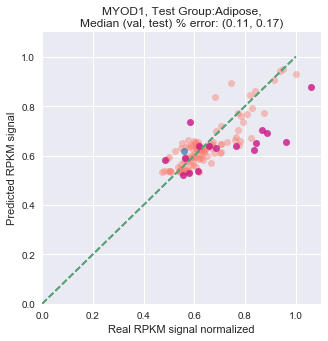

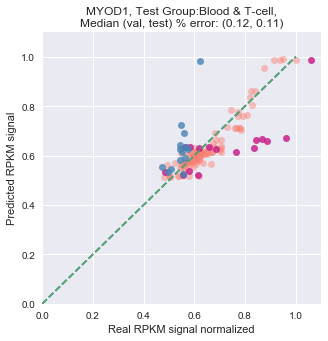

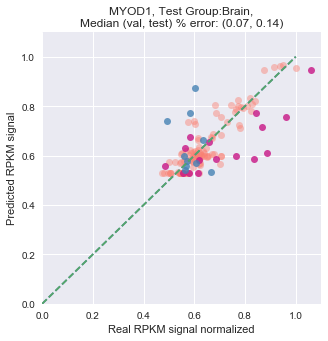

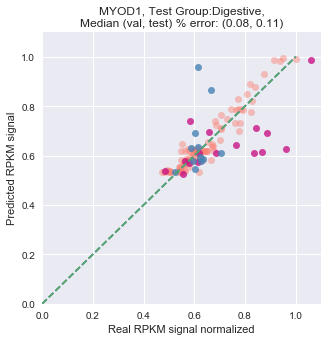

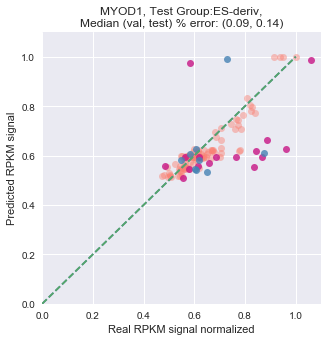

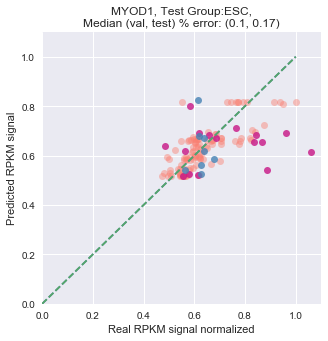

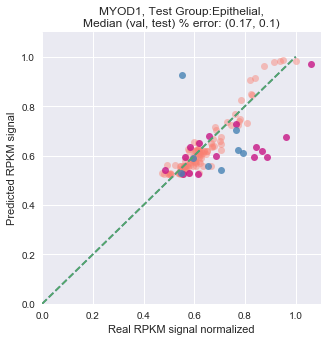

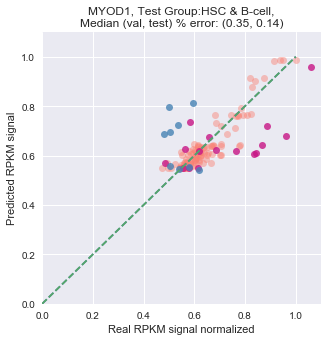

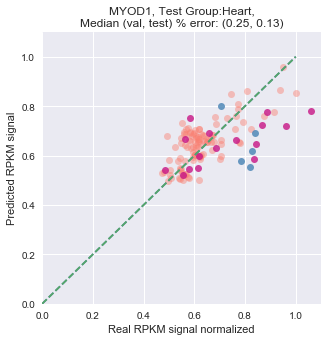

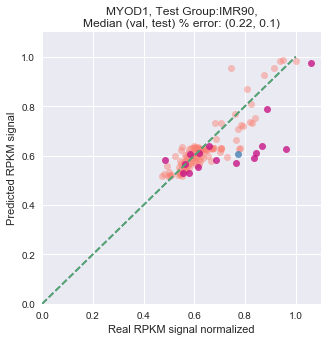

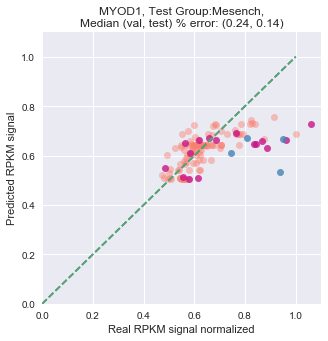

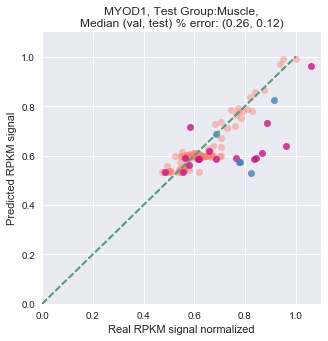

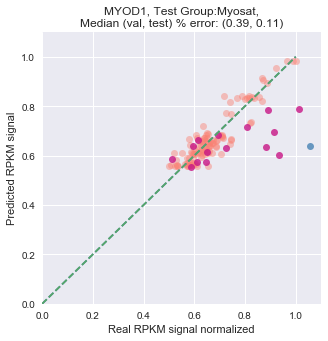

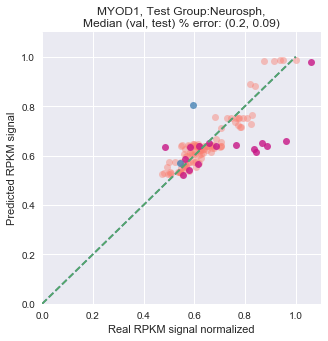

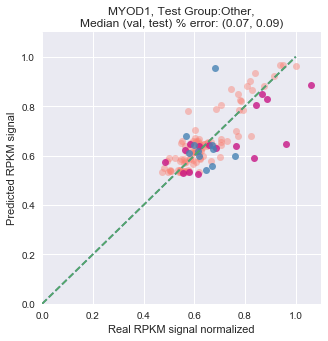

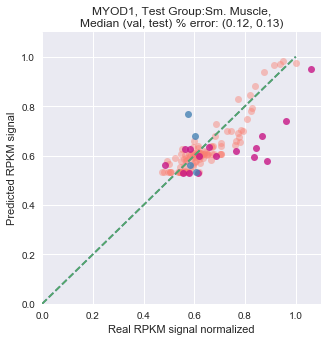

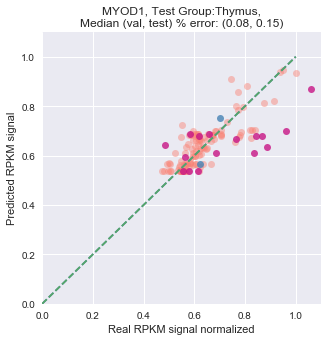

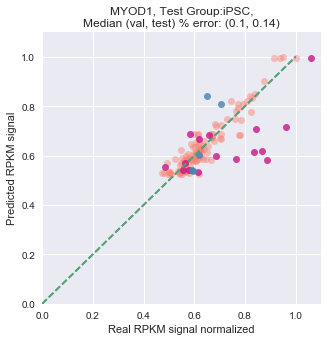

In [3]:
'''Run HPO on differen train/test splits'''
for test_idx in range(0, 1):
    # test_idx = 6  # 5 corresponds to ES_deriv group
    if (test_idx == 4):  # corresponds to val_group of "ENCODE2012"
        continue
    tm = Tensorflow_model(gv, mp, test_eid_group_index=test_idx)
    trials = hyperopt.Trials()

    best_params = hyperopt.fmin(tm.train_tensorflow_nn, trials=trials, space=get_parameter_space_forHPO(tm.trainX),
                                algo=tpe_method, max_evals=10) 

    med_pc_test_error, med_pc_val_error = tm.plot_scatter_performance(trials, gv, index=None)
    med_val_pcc = trials.results[np.argmin(trials.losses())]["val_pcc"].flatten()[-1]
    logger.info("trainX.shape:{}, testX.shape:{}".format(tm.trainX.shape, tm.testX.shape))
    logger.info("Test Group {}: {},\
                Median Test pc Error: {},\
                Median Val (pc error, pcc): ({},{})\
                Best Params: {}".format(
        tm.test_eid_group_index, tm.test_eid_group,
        round(med_pc_test_error, 3),
        round(med_pc_val_error, 3), round(med_val_pcc, 3),
        best_params))
    del tm, trials, best_params

print("Total time taken: {}".format(time.time() - start_time))

# DeepLIFT implementation

trial_idx = 1
plt.plot(trials.results[trial_idx]['train_loss'], color="salmon")
plt.plot(trials.results[trial_idx]['val_loss'], color="mediumvioletred")

In [4]:
# - EOF - 